# ** INSTAGRAM과 NAVER Trend 분석**
* data : ntrend, (v)insta_air_dataset.json, ./data/(v)insta_dis_dataset.json
* tw data :./data/(v)ntrend_twData_Final.json

In [1]:
import pandas as pd


In [2]:
# naver trend data 가져오기
# 2018-04-23 ~ 2018.05.23(1개월)
ntrend = pd.read_csv('./data/naverTrend/trend_onemonth.csv', encoding='utf-8')
ntrend.columns = ['asDate','NA_dis2','NA_airmax97']
ntrend.head(5)

,asDate,NA_dis2,NA_airmax97
0,2018-04-23,8.57142,76.45962
1,2018-04-24,6.95652,74.84472
2,2018-04-25,6.77018,77.14285
3,2018-04-26,5.65217,70.00000
4,2018-04-27,5.46583,65.59006


In [3]:
# INSTA의 AIRMAX 가져오기
inst_air_file = pd.read_json('./data/(v)insta_air_dataset.json')
inst_air_file.head(5)

,asDate,insta_air_comment_count,insta_air_comments_cnt,insta_air_like_cnt,insta_air_media_cnt,insta_air_post_cnt
0,2018-05-19,511,490,7218,156,156
1,2018-05-22,190,251,3001,156,156
10,2018-05-14,36,6,511,18,18
11,2018-05-13,6,5,346,3,3
12,2018-04-05,0,0,2,1,1


In [4]:
#Inst dis 가져오기
inst_dis_file = pd.read_json('./data/(v)insta_dis_dataset.json')
inst_dis_file.head(5)

,asDate,inst_dis_comment_count,inst_dis_comments_cnt,inst_dis_like_cnt,inst_dis_media_cnt,inst_dis_post_cnt
0,2018-05-06,45,33,424,21,21
1,2018-05-13,102,92,1124,19,19
10,2018-05-04,55,42,599,11,11
11,2018-05-10,62,57,461,11,11
12,2018-04-30,33,30,375,10,10


In [5]:
ntrend_air_merge = pd.merge(ntrend,inst_air_file, how='outer',
                           on='asDate', indicator=True)
ntrend_air_merge = ntrend_air_merge[['asDate', 'NA_dis2', 'NA_airmax97', 'insta_air_comment_count',
       'insta_air_comments_cnt', 'insta_air_like_cnt', 'insta_air_media_cnt',
       'insta_air_post_cnt']]
ntrend_air_merge.shape

(36, 8)

In [6]:
ntrend_air_dis_merge = pd.merge(ntrend_air_merge,inst_dis_file, how='outer',
                           on='asDate', indicator=True)
ntrend_air_dis_merge = ntrend_air_dis_merge[['asDate', 'NA_dis2', 'NA_airmax97', 'insta_air_comment_count',
       'insta_air_comments_cnt', 'insta_air_like_cnt', 'insta_air_media_cnt',
       'insta_air_post_cnt', 'inst_dis_comment_count', 'inst_dis_comments_cnt',
       'inst_dis_like_cnt', 'inst_dis_media_cnt', 'inst_dis_post_cnt']]
ntrend_air_dis_merge

,asDate,NA_dis2,NA_airmax97,insta_air_comment_count,insta_air_comments_cnt,insta_air_like_cnt,insta_air_media_cnt,insta_air_post_cnt,inst_dis_comment_count,inst_dis_comments_cnt,inst_dis_like_cnt,inst_dis_media_cnt,inst_dis_post_cnt
0,2018-04-23,8.57142,76.45962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-24,6.95652,74.84472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-25,6.77018,77.14285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-26,5.65217,70.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-27,5.46583,65.59006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-04-28,5.90062,80.55900,NaN,NaN,NaN,NaN,NaN,13.0,1.0,68.0,4.0,4.0
6,2018-04-29,7.51552,88.75776,NaN,NaN,NaN,NaN,NaN,63.0,53.0,1560.0,17.0,17.0
7,2018-04-30,6.39751,77.32919,NaN,NaN,NaN,NaN,NaN,33.0,30.0,375.0,10.0,10.0
8,2018-05-01,6.02484,84.28571,NaN,NaN,NaN,NaN,NaN,41.0,39.0,405.0,12.0,12.0
9,2018-05-02,5.59006,78.32298,NaN,NaN,NaN,NaN,NaN,36.0,36.0,308.0,8.0,8.0


In [7]:
Naver_Inst_cnt_Data = ntrend_air_dis_merge.fillna(0)
Naver_Inst_cnt_Data= round(Naver_Inst_cnt_Data,2)
Naver_Inst_cnt_Data

,asDate,NA_dis2,NA_airmax97,insta_air_comment_count,insta_air_comments_cnt,insta_air_like_cnt,insta_air_media_cnt,insta_air_post_cnt,inst_dis_comment_count,inst_dis_comments_cnt,inst_dis_like_cnt,inst_dis_media_cnt,inst_dis_post_cnt
0,2018-04-23,8.57,76.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-04-24,6.96,74.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-04-25,6.77,77.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-04-26,5.65,70.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-04-27,5.47,65.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018-04-28,5.90,80.56,0.0,0.0,0.0,0.0,0.0,13.0,1.0,68.0,4.0,4.0
6,2018-04-29,7.52,88.76,0.0,0.0,0.0,0.0,0.0,63.0,53.0,1560.0,17.0,17.0
7,2018-04-30,6.40,77.33,0.0,0.0,0.0,0.0,0.0,33.0,30.0,375.0,10.0,10.0
8,2018-05-01,6.02,84.29,0.0,0.0,0.0,0.0,0.0,41.0,39.0,405.0,12.0,12.0
9,2018-05-02,5.59,78.32,0.0,0.0,0.0,0.0,0.0,36.0,36.0,308.0,8.0,8.0


In [8]:
# 가중치 계산 적용
Naver_Inst_cnt_Data['IN_airmax_rate_sum'] = (Naver_Inst_cnt_Data['insta_air_post_cnt']*1)+(Naver_Inst_cnt_Data['insta_air_like_cnt']*1.2)+(Naver_Inst_cnt_Data['insta_air_comments_cnt']*1.5)+(Naver_Inst_cnt_Data['insta_air_media_cnt']*1.7)
Naver_Inst_cnt_Data['IN_dis_rate_sum'] = (Naver_Inst_cnt_Data['inst_dis_post_cnt']*1)+(Naver_Inst_cnt_Data['inst_dis_like_cnt']*1.2)+(Naver_Inst_cnt_Data['inst_dis_comments_cnt']*1.5)+(Naver_Inst_cnt_Data['inst_dis_media_cnt']*1.7)
Naver_Inst_cnt_Data['INSTA_rate_sum'] = Naver_Inst_cnt_Data['IN_airmax_rate_sum'] + Naver_Inst_cnt_Data['IN_dis_rate_sum']

In [9]:
Naver_Inst_cnt_Data

,asDate,NA_dis2,NA_airmax97,insta_air_comment_count,insta_air_comments_cnt,insta_air_like_cnt,insta_air_media_cnt,insta_air_post_cnt,inst_dis_comment_count,inst_dis_comments_cnt,inst_dis_like_cnt,inst_dis_media_cnt,inst_dis_post_cnt,IN_airmax_rate_sum,IN_dis_rate_sum,INSTA_rate_sum
0,2018-04-23,8.57,76.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-04-24,6.96,74.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-04-25,6.77,77.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-04-26,5.65,70.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-04-27,5.47,65.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018-04-28,5.90,80.56,0.0,0.0,0.0,0.0,0.0,13.0,1.0,68.0,4.0,4.0,0.0,93.9,93.9
6,2018-04-29,7.52,88.76,0.0,0.0,0.0,0.0,0.0,63.0,53.0,1560.0,17.0,17.0,0.0,1997.4,1997.4
7,2018-04-30,6.40,77.33,0.0,0.0,0.0,0.0,0.0,33.0,30.0,375.0,10.0,10.0,0.0,522.0,522.0
8,2018-05-01,6.02,84.29,0.0,0.0,0.0,0.0,0.0,41.0,39.0,405.0,12.0,12.0,0.0,576.9,576.9
9,2018-05-02,5.59,78.32,0.0,0.0,0.0,0.0,0.0,36.0,36.0,308.0,8.0,8.0,0.0,445.2,445.2


In [10]:
# ./data/(v)ntrend_twData_Final.json
# Naver_Inst_cnt_Data.to_json('./data/(v)ntrend_INSTAData_Final.json')

In [11]:
# 그래프를 그리고 분석하기 위한 컬럼만 추출한다.
# Naver_Inst_cnt_Data.columns
naver_Inst_graph_data = Naver_Inst_cnt_Data[['asDate', 'NA_dis2', 'NA_airmax97','IN_airmax_rate_sum', 'IN_dis_rate_sum', 'INSTA_rate_sum']]
naver_Inst_graph_data

,asDate,NA_dis2,NA_airmax97,IN_airmax_rate_sum,IN_dis_rate_sum,INSTA_rate_sum
0,2018-04-23,8.57,76.46,0.0,0.0,0.0
1,2018-04-24,6.96,74.84,0.0,0.0,0.0
2,2018-04-25,6.77,77.14,0.0,0.0,0.0
3,2018-04-26,5.65,70.00,0.0,0.0,0.0
4,2018-04-27,5.47,65.59,0.0,0.0,0.0
5,2018-04-28,5.90,80.56,0.0,93.9,93.9
6,2018-04-29,7.52,88.76,0.0,1997.4,1997.4
7,2018-04-30,6.40,77.33,0.0,522.0,522.0
8,2018-05-01,6.02,84.29,0.0,576.9,576.9
9,2018-05-02,5.59,78.32,0.0,445.2,445.2


In [12]:
inst_max=round(naver_Inst_graph_data['INSTA_rate_sum'].max(),2)

In [13]:
naver_Inst_graph_data['inst_air_freq'] = (naver_Inst_graph_data['IN_airmax_rate_sum']/inst_max)*100
naver_Inst_graph_data['inst_dis_freq'] = (naver_Inst_graph_data['IN_dis_rate_sum']/inst_max)*100
naver_Inst_graph_data['inst_freq'] = (naver_Inst_graph_data['INSTA_rate_sum']/inst_max)*100
naver_Inst_graph_data = round(naver_Inst_graph_data,2)

c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\programdata\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [14]:
naver_Inst_graph_data

,asDate,NA_dis2,NA_airmax97,IN_airmax_rate_sum,IN_dis_rate_sum,INSTA_rate_sum,inst_air_freq,inst_dis_freq,inst_freq
0,2018-04-23,8.57,76.46,0.0,0.0,0.0,0.00,0.00,0.00
1,2018-04-24,6.96,74.84,0.0,0.0,0.0,0.00,0.00,0.00
2,2018-04-25,6.77,77.14,0.0,0.0,0.0,0.00,0.00,0.00
3,2018-04-26,5.65,70.00,0.0,0.0,0.0,0.00,0.00,0.00
4,2018-04-27,5.47,65.59,0.0,0.0,0.0,0.00,0.00,0.00
5,2018-04-28,5.90,80.56,0.0,93.9,93.9,0.00,0.76,0.76
6,2018-04-29,7.52,88.76,0.0,1997.4,1997.4,0.00,16.16,16.16
7,2018-04-30,6.40,77.33,0.0,522.0,522.0,0.00,4.22,4.22
8,2018-05-01,6.02,84.29,0.0,576.9,576.9,0.00,4.67,4.67
9,2018-05-02,5.59,78.32,0.0,445.2,445.2,0.00,3.60,3.60


In [46]:
# naver_Inst_graph_data.to_json('./data/(v)Insta_Graph')

In [23]:
naver_Inst_graph_data=naver_Inst_graph_data.sort_values('asDate')
naver_Inst_graph_data01 = naver_Inst_graph_data
naver_Inst_graph_data01

,asDate,NA_dis2,NA_airmax97,IN_airmax_rate_sum,IN_dis_rate_sum,INSTA_rate_sum,inst_air_freq,inst_dis_freq,inst_freq
33,2017-10-16,0.00,0.00,37.5,0.0,37.5,0.30,0.00,0.30
34,2017-10-17,0.00,0.00,1.5,0.0,1.5,0.01,0.00,0.01
32,2018-04-03,0.00,0.00,27.6,0.0,27.6,0.22,0.00,0.22
31,2018-04-05,0.00,0.00,5.1,0.0,5.1,0.04,0.00,0.04
0,2018-04-23,8.57,76.46,0.0,0.0,0.0,0.00,0.00,0.00
1,2018-04-24,6.96,74.84,0.0,0.0,0.0,0.00,0.00,0.00
2,2018-04-25,6.77,77.14,0.0,0.0,0.0,0.00,0.00,0.00
3,2018-04-26,5.65,70.00,0.0,0.0,0.0,0.00,0.00,0.00
4,2018-04-27,5.47,65.59,0.0,0.0,0.0,0.00,0.00,0.00
5,2018-04-28,5.90,80.56,0.0,93.9,93.9,0.00,0.76,0.76


In [36]:
naver_Inst_graph_data = naver_Inst_graph_data.drop([0,1,2,3,4])

In [37]:
naver_Inst_graph_data

,asDate,NA_dis2,NA_airmax97,IN_airmax_rate_sum,IN_dis_rate_sum,INSTA_rate_sum,inst_air_freq,inst_dis_freq,inst_freq
5,2018-04-28,5.90,80.56,0.0,93.9,93.9,0.00,0.76,0.76
6,2018-04-29,7.52,88.76,0.0,1997.4,1997.4,0.00,16.16,16.16
7,2018-04-30,6.40,77.33,0.0,522.0,522.0,0.00,4.22,4.22
8,2018-05-01,6.02,84.29,0.0,576.9,576.9,0.00,4.67,4.67
9,2018-05-02,5.59,78.32,0.0,445.2,445.2,0.00,3.60,3.60
10,2018-05-03,6.46,75.40,0.0,752.7,752.7,0.00,6.09,6.09
11,2018-05-04,6.34,67.08,0.0,811.5,811.5,0.00,6.57,6.57
12,2018-05-05,7.33,73.60,0.0,424.8,424.8,0.00,3.44,3.44
13,2018-05-06,6.96,93.42,0.0,615.0,615.0,0.00,4.98,4.98
14,2018-05-07,7.02,87.14,0.0,490.5,490.5,0.00,3.97,3.97


In [16]:
# 그래프를 그리자.
%matplotlib inline
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
path = 'C:/Windows/Fonts/HANDotum.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

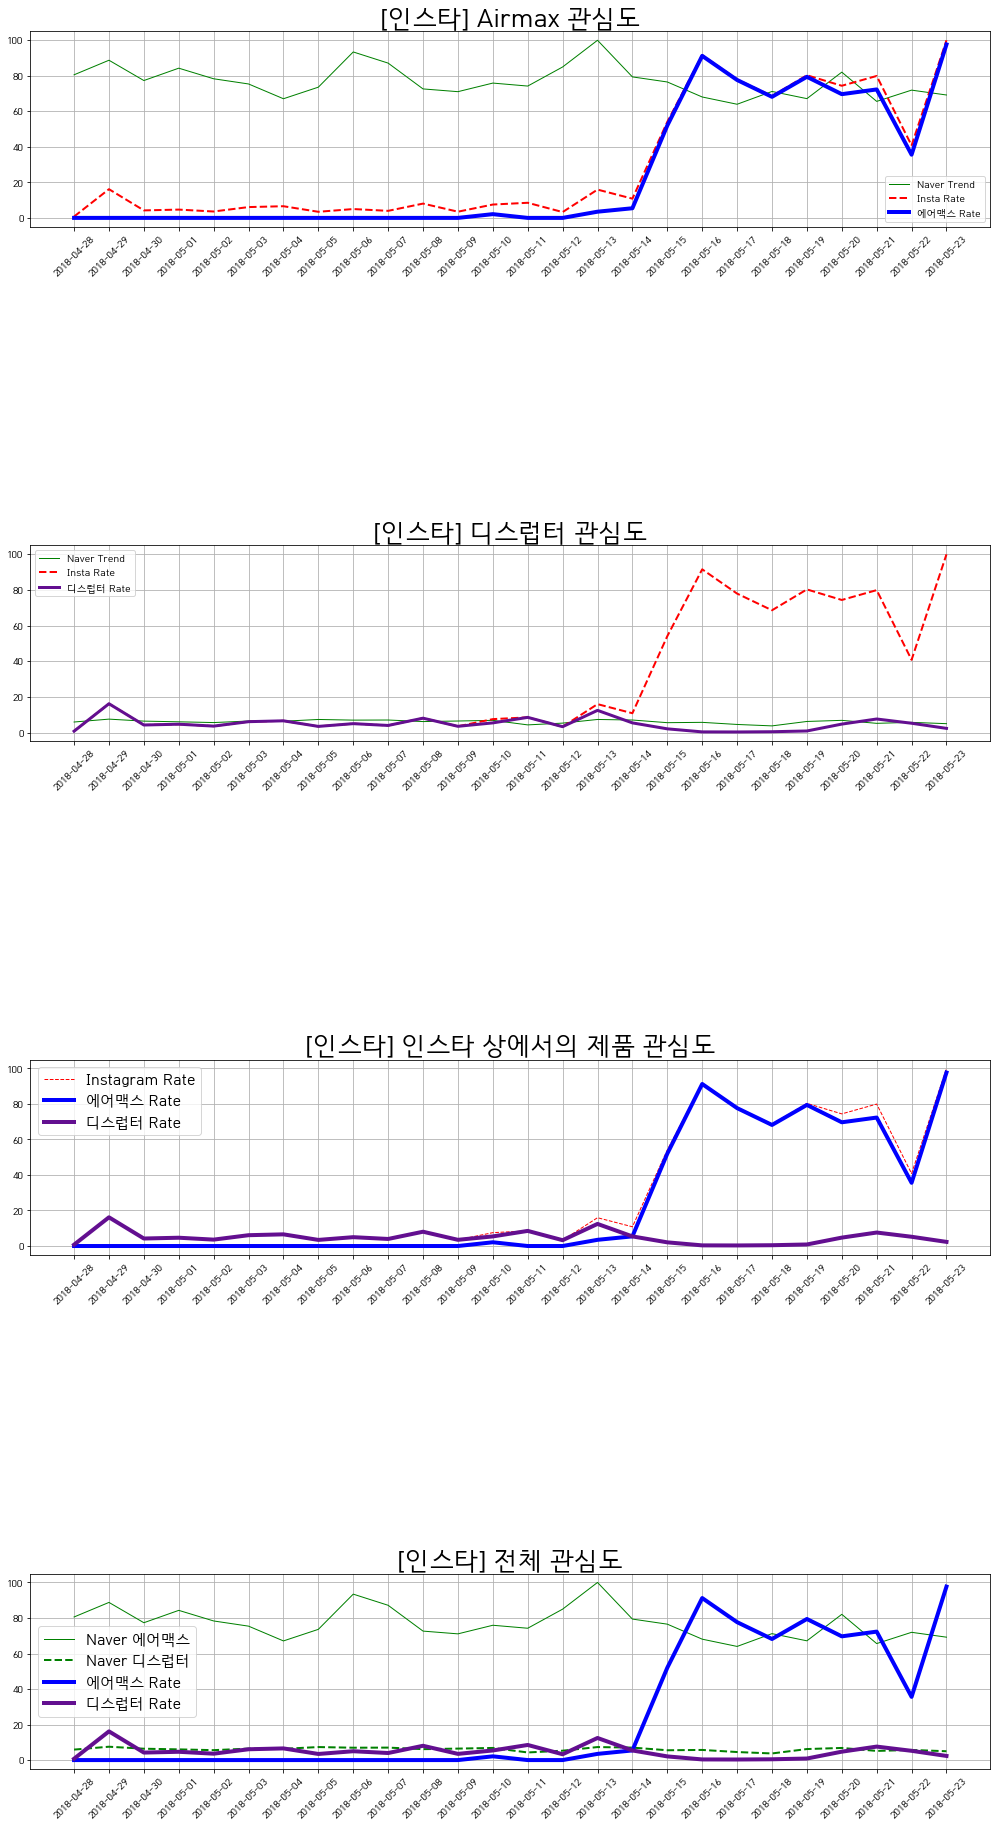

In [43]:
plt.figure(figsize=(14,25))
# fig.subplots_adjust(hspace=10)
plt.subplot(711)
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['NA_airmax97'], color='g', lw=1, label='Naver Trend')
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['inst_freq'], color='r', lw=2, label='Insta Rate', linestyle='--')
# plt.plot(TW_Time['nDate'],TW_Time['dis_tw_freq'])
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['inst_air_freq'], color='b',lw=4, label='에어맥스 Rate')
plt.tight_layout()
plt.title('[인스타] Airmax 관심도',size='25')
# plt.set_ylabel('관심도(%)',size=20)
# ax.set_xlabel('기간',size=20)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
# plt.subplots_adjust()

plt.subplot(713)
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['NA_dis2'], color='g', lw=1, label='Naver Trend')
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['inst_freq'], color='r', lw=2, label='Insta Rate', linestyle='--')
# plt.plot(TW_Time['nDate'],TW_Time['dis_tw_freq'])
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['inst_dis_freq'], color='#630F90',lw=3, label='디스럽터 Rate')
plt.tight_layout()
plt.title('[인스타] 디스럽터 관심도',size='25')
# plt.set_ylabel('관심도(%)',size=20)
# ax.set_xlabel('기간',size=20)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.subplot(715)
plt.title('[인스타] 인스타 상에서의 제품 관심도',size='25')
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['inst_freq'], color='r', lw=1, label='Instagram Rate', linestyle='--')
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['inst_air_freq'], color='b', lw=4, label='에어맥스 Rate')
# plt.plot(TW_Time['nDate'],TW_Time['dis_tw_freq'])
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['inst_dis_freq'], color='#630F90',lw=4, label='디스럽터 Rate')
plt.tight_layout()
# plt.set_ylabel('관심도(%)',size=20)
# ax.set_xlabel('기간',size=20)
plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.grid(True)

plt.subplot(717)
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['NA_airmax97'], color='g', lw=1, label='Naver 에어맥스')
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['NA_dis2'], color='g', lw=2, label='Naver 디스럽터', linestyle='--')
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['inst_air_freq'], color='b', lw=4, label='에어맥스 Rate')
# plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['inst_freq'], color='g', lw=3, label='디스럽터 Rate')
# plt.plot(TW_Time['nDate'],TW_Time['dis_tw_freq'])
plt.plot(naver_Inst_graph_data['asDate'],naver_Inst_graph_data['inst_dis_freq'], color='#630F90',lw=4, label='디스럽터 Rate')
plt.tight_layout()
plt.title('[인스타] 전체 관심도',size='25')
# plt.set_ylabel('관심도(%)',size=20)
# ax.set_xlabel('기간',size=20)
plt.xticks(rotation=45)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()